In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
from scipy.stats import norm as norm
from sklearn.model_selection import train_test_split

In [2]:
def solve_pdfs(pdf_mean_1, pdf_mean_2, pdf_std_1, pdf_std_2):
    coeff1 = 1/(2*pdf_std_1**2) - 1/(2*pdf_std_2**2)
    coeff2 = pdf_mean_2/(pdf_std_2**2) - pdf_mean_1/(pdf_std_1**2)
    coeff3 = pdf_mean_1**2 /(2*pdf_std_1**2) - pdf_mean_2**2 / (2*pdf_std_2**2) - np.log(pdf_std_2/pdf_std_1)

    coeffs = [coeff1, coeff2, coeff3]

    roots_of_eq = np.roots(coeffs)
    threshold = roots_of_eq[1]
    return threshold

In [4]:
def find_w_cordinates(X_train1, X_train2):
    
    # 1. Find M1, M2, Cov1, Cov2
    Mean1 = np.mean(X_train1,axis=0)
    Mean2 = np.mean(X_train2,axis=0)
    Mean_difference = np.subtract(Mean1,Mean2)

    Cov1 = np.cov(np.transpose(X_train1))
    Cov2 = np.cov(np.transpose(X_train2))

    # 2. Within class spread Sw = Cov1 + Cov2  
    Sw_inv = np.linalg.inv(np.add(Cov1,Cov2))
    
    # 3. W = (Sw_inv).(M1-M2)
    W = np.dot(Sw_inv,Mean_difference)
    
    # 4. Normalise W
    W_norm = W / np.linalg.norm(W)
    
    return W_norm

In [5]:
def find_threshold(X_train1, X_train2, W,dataset_name):
    # Threshold = point of intersection of the pdfs (probability density functions)
    
    # 1. Find Projections
    Proj1 = np.dot(W,X_train1.transpose())
    Proj2 = np.dot(W,X_train2.transpose())
    
    # 2. Find Means of the projected data for class 1 and 2
    proj_mean1 = np.mean(Proj1)
    proj_mean2 = np.mean(Proj2)

    # 3. Find Std deviations of the projected data for class 1 and 2
    proj_std1 = np.std(Proj1)
    proj_std2 = np.std(Proj2)

    # 4. Solve the equations
    threshold = solve_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2)

    return threshold

In [6]:
def find_predictions(X_test, W, threshold):
    
    # Project the Test data onto W
    proj_testdata = np.dot(W, X_test.transpose()).reshape(X_test.shape[0],1)
    
    # Compare with threshold
    predictions = (proj_testdata >= threshold).astype(int).reshape(X_test.shape[0],1)
    
    return proj_testdata, predictions

In [7]:
def plot_projections(projections, y_test, threshold,dataset_name):
    proj_pred_data = pd.DataFrame(np.concatenate((projections, y_test), axis=1))
    proj1_pred = proj_pred_data.loc[proj_pred_data[1] >=8.5][[0]]
    proj2_pred = proj_pred_data.loc[proj_pred_data[1] <8.5][[0]]    
    plt.plot(proj1_pred, np.ones(proj1_pred.shape), '.', color='b', label='Class 1 (value 1)')
    plt.plot(proj2_pred, np.ones(proj2_pred.shape), '.', color='r',label='Class 2 (value 0)')
    plt.plot([threshold], [1], '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Projections onto W vector. Threshold = '+ str(threshold))
    plt.show()

In [8]:
def fisher(X_train1, X_train2, X_test, y_test,dataset_name):
    
    # 1. Find Projection Line
    W = find_w_cordinates(X_train1, X_train2)
    
    # 2. Find Threshold
    threshold = find_threshold(X_train1, X_train2, W,dataset_name)
    
    # 3. Find Predictions for the Test Data by Projecting onto W and comparing to the threshold
    projections, y_predicted = find_predictions(X_test, W, threshold)
    
    # Plot the projections
    plot_projections(projections, y_test, threshold,dataset_name)

Test_Fisher - 1


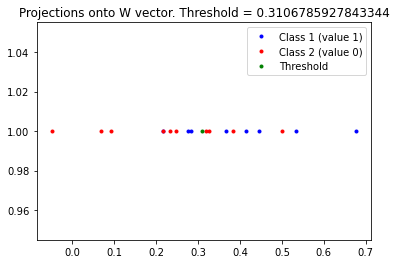

In [9]:
data = pd.read_csv('C:/Users/Zualfiqar/Desktop/hostel_factors.csv', header=None)
X = data[[0,1]]
y = data[[2]]

# label = 1 -> Class 1
# label = 2 -> Class 2

# X_1 => Feature vectors of all the points in class1
# X_2 => Feature vectors of all the points in class2

X_1 = data.loc[data[2]>=8.5][[0,1]]
X_2 = data.loc[data[2]<8.5][[0,1]]

print('Test_Fisher - 1')

fisher(X_1, X_2, X, y.values,data)